# Bar Graph Examples

Teng-Jui Lin

- Created: 2023-05-27
- Edited: 2024-05-28

In [1]:
from bar_constants import *
set_save_fig_rc()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Nonzero y-minimum

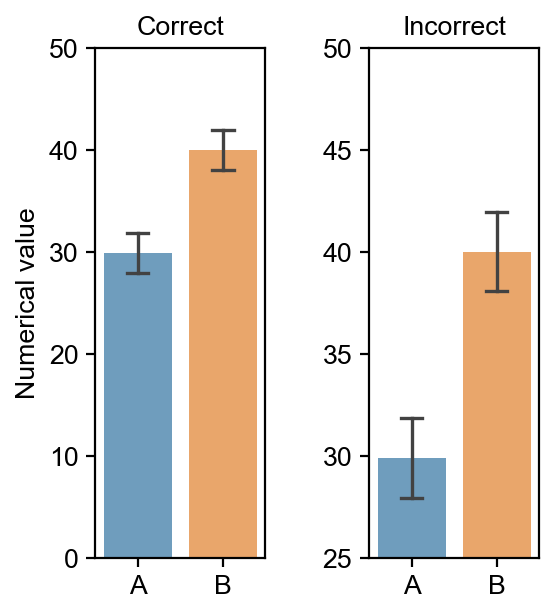

In [2]:
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(30, 2, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(40, 2, SAMPLE_SIZE).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B']
bar_df = swarm_df

col = 2
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))
for i in range(col):
    sns.barplot(
        bar_df,
        errorbar=BAR_ERRORBAR,
        capsize=BAR_CAPSIZE,
        linewidth=BAR_LINEWIDTH,
        edgecolor=BAR_EDGECOLOR,
        alpha=BAR_ALPHA,
        width=BAR_WIDTH,
        ax=axs[i],
    )
    axs[i].set_box_aspect(3)
axs[0].set_ylim(0, 50)
axs[1].set_ylim(25, 50)
axs[0].set_title('Correct')
axs[1].set_title('Incorrect')
axs[0].set_ylabel('Numerical value')
plt.tight_layout()
fig.savefig('figures/subpanels/ex-fig-1-zeroing-mistake.pdf')

## log y-axis of numerical value

In [3]:
def mean_bar(df, ax, width=0.1, color='k'):
    LINEWIDTH = 1
    for i in range(df.shape[1]):
        if type(color) == str:
            mean_color = color
            error_color = color
        elif type(color) == list:
            mean_color=color[i]
            error_color = color[i]
        else:
            pass
        ax.hlines(
            y=df.mean()[i],
            xmin=i-width,
            xmax=i+width,
            color=mean_color,
            zorder=100,
            linewidth=LINEWIDTH,
        )
        ax.errorbar(
            x=df.columns[i], 
            y=df.mean()[i], 
            yerr=df.std()[i], 
            capsize=5, 
            capthick=LINEWIDTH,
            color=error_color,
            zorder=100,
            linewidth=LINEWIDTH,
        )
    ax.set_xlim(-0.5, df.shape[1]-0.5)

In [4]:
def bar_plot(df, ax):
    sns.barplot(
        df,
        errorbar=BAR_ERRORBAR,
        capsize=BAR_CAPSIZE,
        linewidth=BAR_LINEWIDTH,
        edgecolor=BAR_EDGECOLOR,
        alpha=BAR_ALPHA,
        width=BAR_WIDTH,
        ax=ax,
        err_kws=dict(linewidth=1),
    )

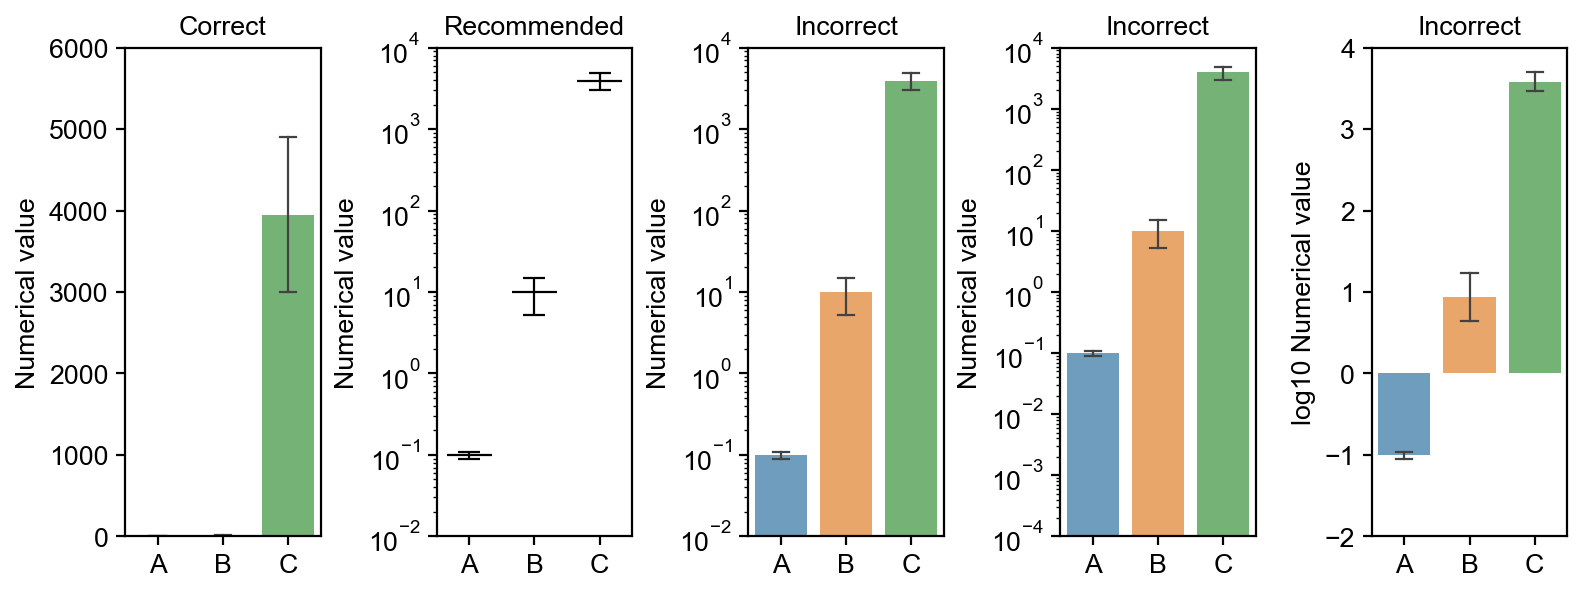

In [5]:
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.1, 0.01, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(10, 5, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(4000, 1000, SAMPLE_SIZE).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df

col = 5
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))

bar_plot(bar_df, axs[0])
mean_bar(bar_df, ax=axs[1], width=0.35)
bar_plot(bar_df, axs[2])
bar_plot(bar_df, axs[3])
bar_plot(np.log10(bar_df), axs[4])

for i in range(col):
    axs[i].set_box_aspect(2.5)

axs[0].set_ylim(0, 6000)
axs[1].set_ylim(1e-2, 1e4)
axs[2].set_ylim(1e-2, 1e4)
axs[3].set_ylim(1e-4, 1e4)
axs[4].set_ylim(-2, 4)

axs[1].set_yscale('log')
axs[2].set_yscale('log')
axs[3].set_yscale('log')

axs[0].set_title('Correct')
axs[1].set_title('Recommended')
axs[2].set_title('Incorrect')
axs[3].set_title('Incorrect')
axs[4].set_title('Incorrect')

axs[0].set_ylabel('Numerical value')
axs[1].set_ylabel('Numerical value')
axs[2].set_ylabel('Numerical value')
axs[3].set_ylabel('Numerical value')
axs[4].set_ylabel('log10 Numerical value')
plt.tight_layout()
fig.savefig('figures/subpanels/ex-fig-2-log-mistake-numerical.pdf')

## log y-axis of fold changes (relative)

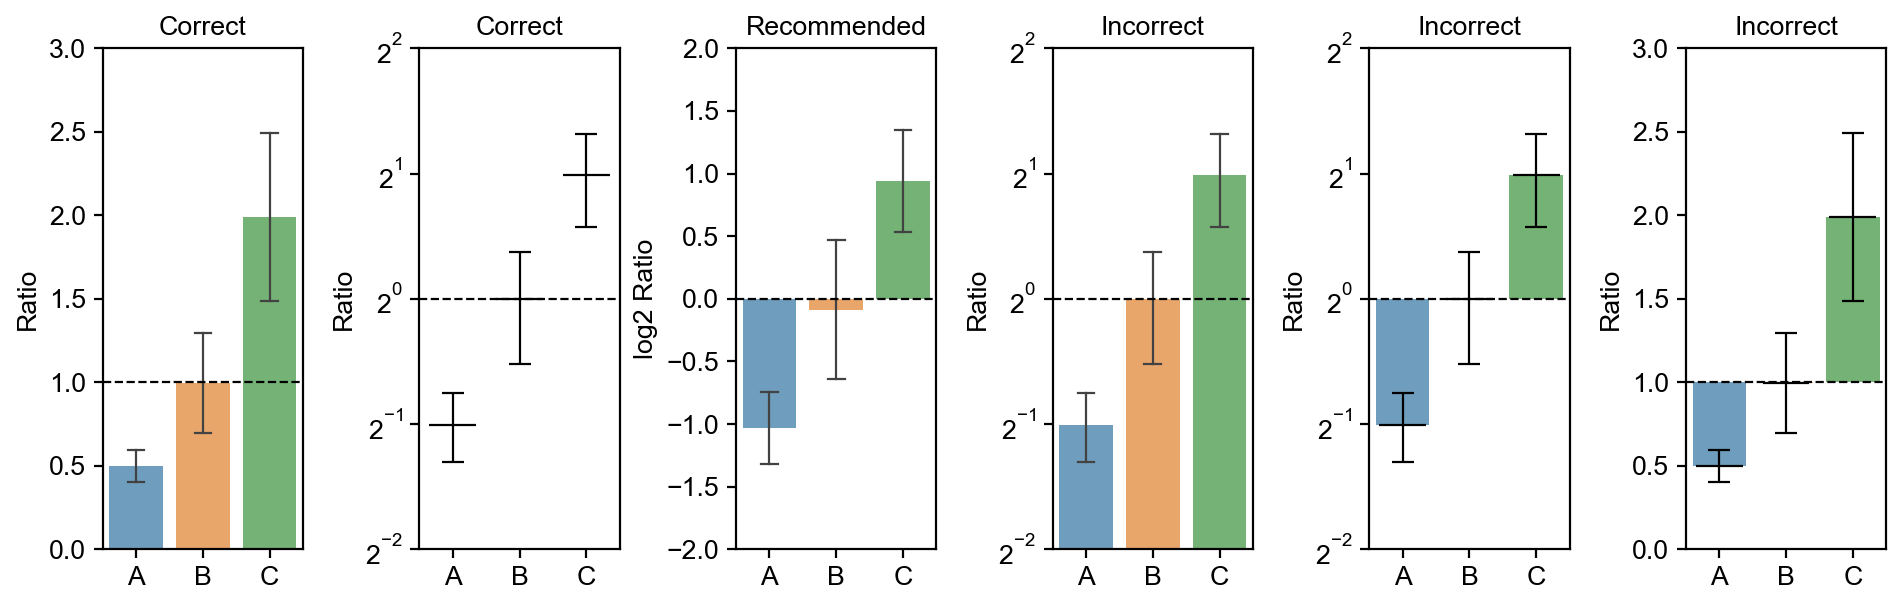

In [6]:
np.random.seed(10)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.5, 0.1, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(1, 0.3, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(2, 0.5, SAMPLE_SIZE).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df

col = 6
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))

bar_plot(bar_df, axs[0])
mean_bar(bar_df, ax=axs[1], width=0.35)
bar_plot(np.log2(bar_df), axs[2])
bar_plot(bar_df, axs[3])
mean_bar(bar_df, ax=axs[4], width=0.35)
sns.barplot(
    bar_df - 1,
    errorbar=None,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    bottom=1,
    ax=axs[4],
)

mean_bar(bar_df, ax=axs[5], width=0.35)
sns.barplot(
    bar_df - 1,
    errorbar=None,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    bottom=1,
    ax=axs[5],
)

for i in range(col):
    axs[i].set_box_aspect(2.5)

axs[0].axhline(1, color='k', lw=1, ls='--')
axs[1].axhline(1, color='k', lw=1, ls='--')
axs[2].axhline(0, color='k', lw=1, ls='--')
axs[3].axhline(1, color='k', lw=1, ls='--')
axs[4].axhline(1, color='k', lw=1, ls='--')
axs[5].axhline(1, color='k', lw=1, ls='--')

axs[0].set_ylim(0, 3)
axs[1].set_ylim(2**(-2), 2**2)
axs[2].set_ylim(-2, 2)
axs[3].set_ylim(2**(-2), 2**2)
axs[4].set_ylim(2**(-2), 2**2)
axs[5].set_ylim(0, 3)

axs[1].set_yscale('log', base=2)
axs[3].set_yscale('log', base=2)
axs[4].set_yscale('log', base=2)

axs[0].set_title('Correct')
axs[1].set_title('Correct')
axs[2].set_title('Recommended')
axs[3].set_title('Incorrect')
axs[4].set_title('Incorrect')
axs[5].set_title('Incorrect')

axs[0].set_ylabel('Ratio')
axs[1].set_ylabel('Ratio')
axs[2].set_ylabel('log2 Ratio')
axs[3].set_ylabel('Ratio')
axs[4].set_ylabel('Ratio')
axs[5].set_ylabel('Ratio')
plt.tight_layout()
fig.savefig('figures/subpanels/ex-fig-3-log-mistake-ratio-relative.pdf')

## log y-axis of fold changes (absolute)

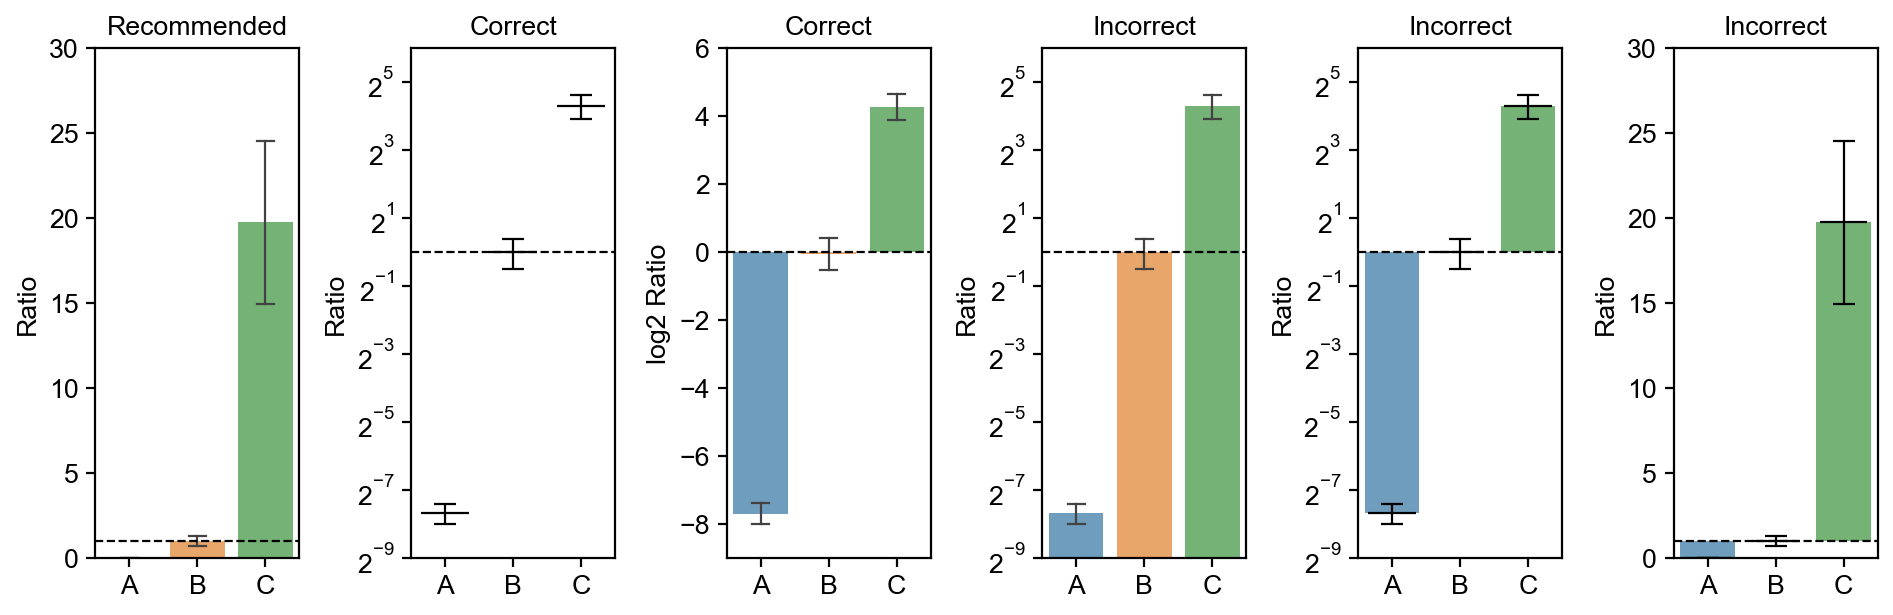

In [7]:
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.005, 0.001, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(1, 0.3, SAMPLE_SIZE).reshape(-1, 1),
    np.random.normal(20, 5, SAMPLE_SIZE).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df

col = 6
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))

bar_plot(bar_df, axs[0])
mean_bar(bar_df, ax=axs[1], width=0.35)
bar_plot(np.log2(bar_df), axs[2])
bar_plot(bar_df, axs[3])

mean_bar(bar_df, ax=axs[4], width=0.35)
sns.barplot(
    bar_df - 1,
    errorbar=None,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    bottom=1,
    ax=axs[4],
)

mean_bar(bar_df, ax=axs[5], width=0.35)
sns.barplot(
    bar_df - 1,
    errorbar=None,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    bottom=1,
    ax=axs[5],
)


for i in range(col):
    axs[i].set_box_aspect(2.5)

axs[0].axhline(1, color='k', lw=1, ls='--')
axs[1].axhline(1, color='k', lw=1, ls='--')
axs[2].axhline(0, color='k', lw=1, ls='--')
axs[3].axhline(1, color='k', lw=1, ls='--')
axs[4].axhline(1, color='k', lw=1, ls='--')
axs[5].axhline(1, color='k', lw=1, ls='--')

axs[0].set_ylim(0, 30)
axs[1].set_ylim(2**(-9), 2**6)
axs[2].set_ylim(-9, 6)
axs[3].set_ylim(2**(-9), 2**6)
axs[4].set_ylim(2**(-9), 2**6)
axs[5].set_ylim(0, 30)

axs[1].set_yscale('log', base=2)
axs[3].set_yscale('log', base=2)
axs[4].set_yscale('log', base=2)

axs[0].set_title('Recommended')
axs[1].set_title('Correct')
axs[2].set_title('Correct')
axs[3].set_title('Incorrect')
axs[4].set_title('Incorrect')
axs[5].set_title('Incorrect')

axs[0].set_ylabel('Ratio')
axs[1].set_ylabel('Ratio')
axs[2].set_ylabel('log2 Ratio')
axs[3].set_ylabel('Ratio')
axs[4].set_ylabel('Ratio')
axs[5].set_ylabel('Ratio')
plt.tight_layout()
fig.savefig('figures/subpanels/ex-fig-4-log-mistake-ratio-absolute.pdf')

## Single value visualization with point plot

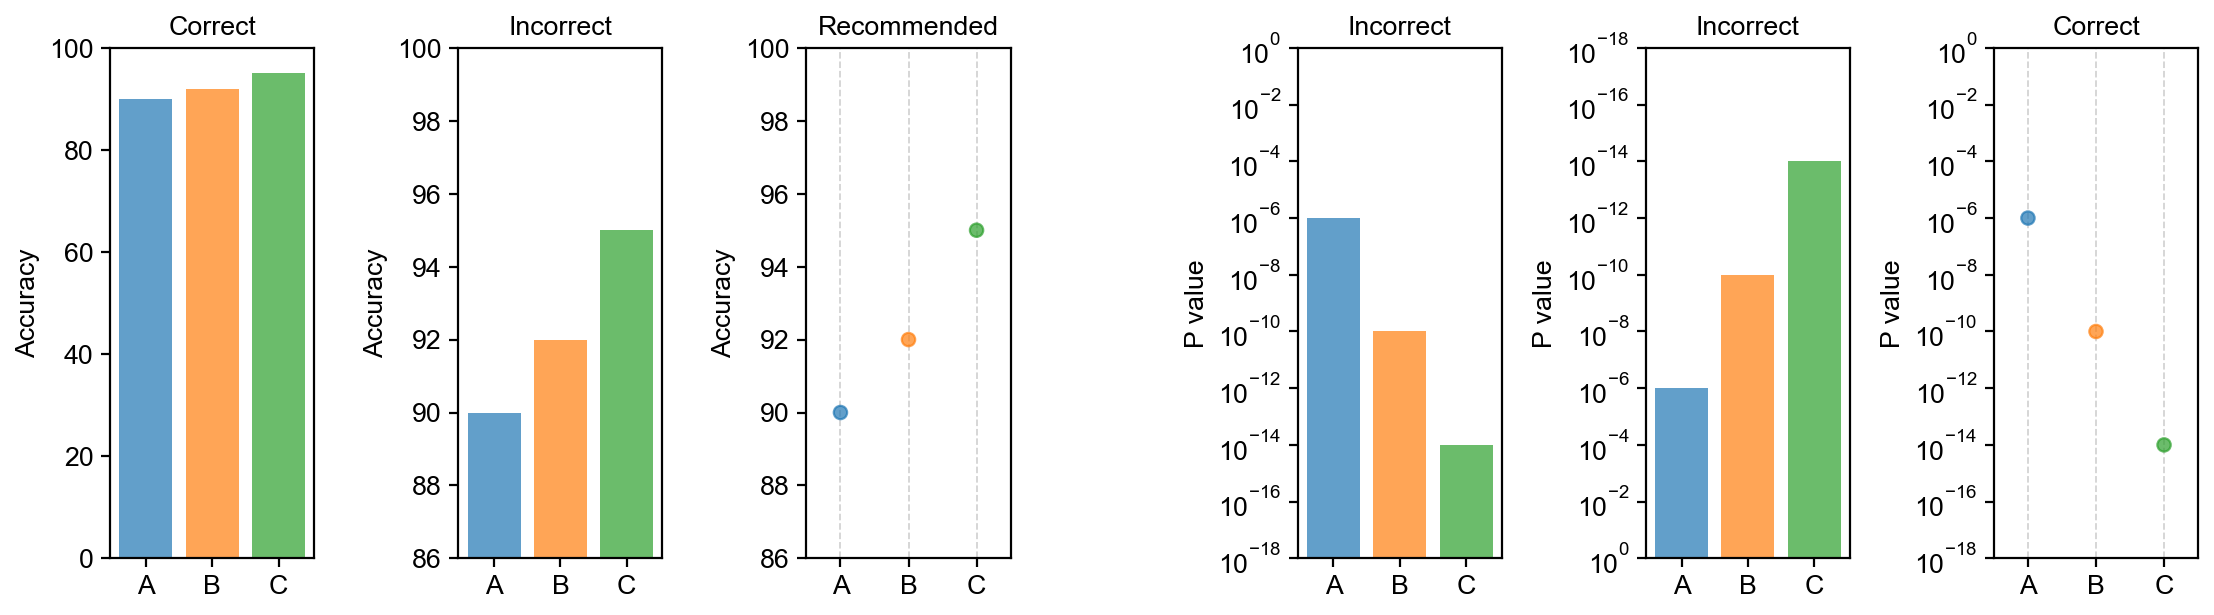

In [8]:
x = ['A', 'B', 'C']
y = np.array([-6, -10, -14])
y_linear = np.array([90, 92, 95])
colors = ['tab:blue', 'tab:orange', 'tab:green']

col = 7
row = 1
col_scale = 2
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale), width_ratios=[1, 1, 1, 0.1, 1, 1, 1])
axs[0].bar(x, y_linear, alpha=BAR_ALPHA, color=colors)
axs[1].bar(x, y_linear, alpha=BAR_ALPHA, color=colors)
axs[2].scatter(x, y_linear, alpha=BAR_ALPHA, color=colors, zorder=100)

axs[0].set_ylim(0, 100)
axs[1].set_ylim(86, 100)
axs[2].set_ylim(86, 100)

axs[2].set_xlim(-0.5, len(y)-0.5)
axs[2].grid(axis='x', zorder=-100, color='lightgray', ls='--')

axs[0].set_title('Correct')
axs[1].set_title('Incorrect')
axs[2].set_title('Recommended')

for i in range(0, 3):
    axs[i].set_box_aspect(2.5)
    axs[i].set_ylabel('Accuracy')

axs[4].bar(x, 10.**y, alpha=BAR_ALPHA, color=colors)
axs[5].bar(x, 10.**y - 1, bottom=1, alpha=BAR_ALPHA, color=colors)
axs[6].scatter(x, 10.**y, zorder=100, alpha=BAR_ALPHA, color=colors)

axs[4].set_ylim(1e-18, 1e0)
axs[5].set_ylim(1e0, 1e-18)
axs[6].set_ylim(1e-18, 1e0)

axs[6].set_xlim(-0.5, len(y)-0.5)
axs[6].grid(axis='x', zorder=-100, color='lightgray', ls='--')

axs[4].set_title('Incorrect')
axs[5].set_title('Incorrect')
axs[6].set_title('Correct')

for i in range(4, 7):
    axs[i].set_box_aspect(2.5)
    axs[i].set_yscale('log')
    axs[i].set_ylabel('P value')

axs[3].axis('off')
plt.tight_layout()
fig.savefig('figures/subpanels/ex-fig-5-single-value.pdf')

## Guideline

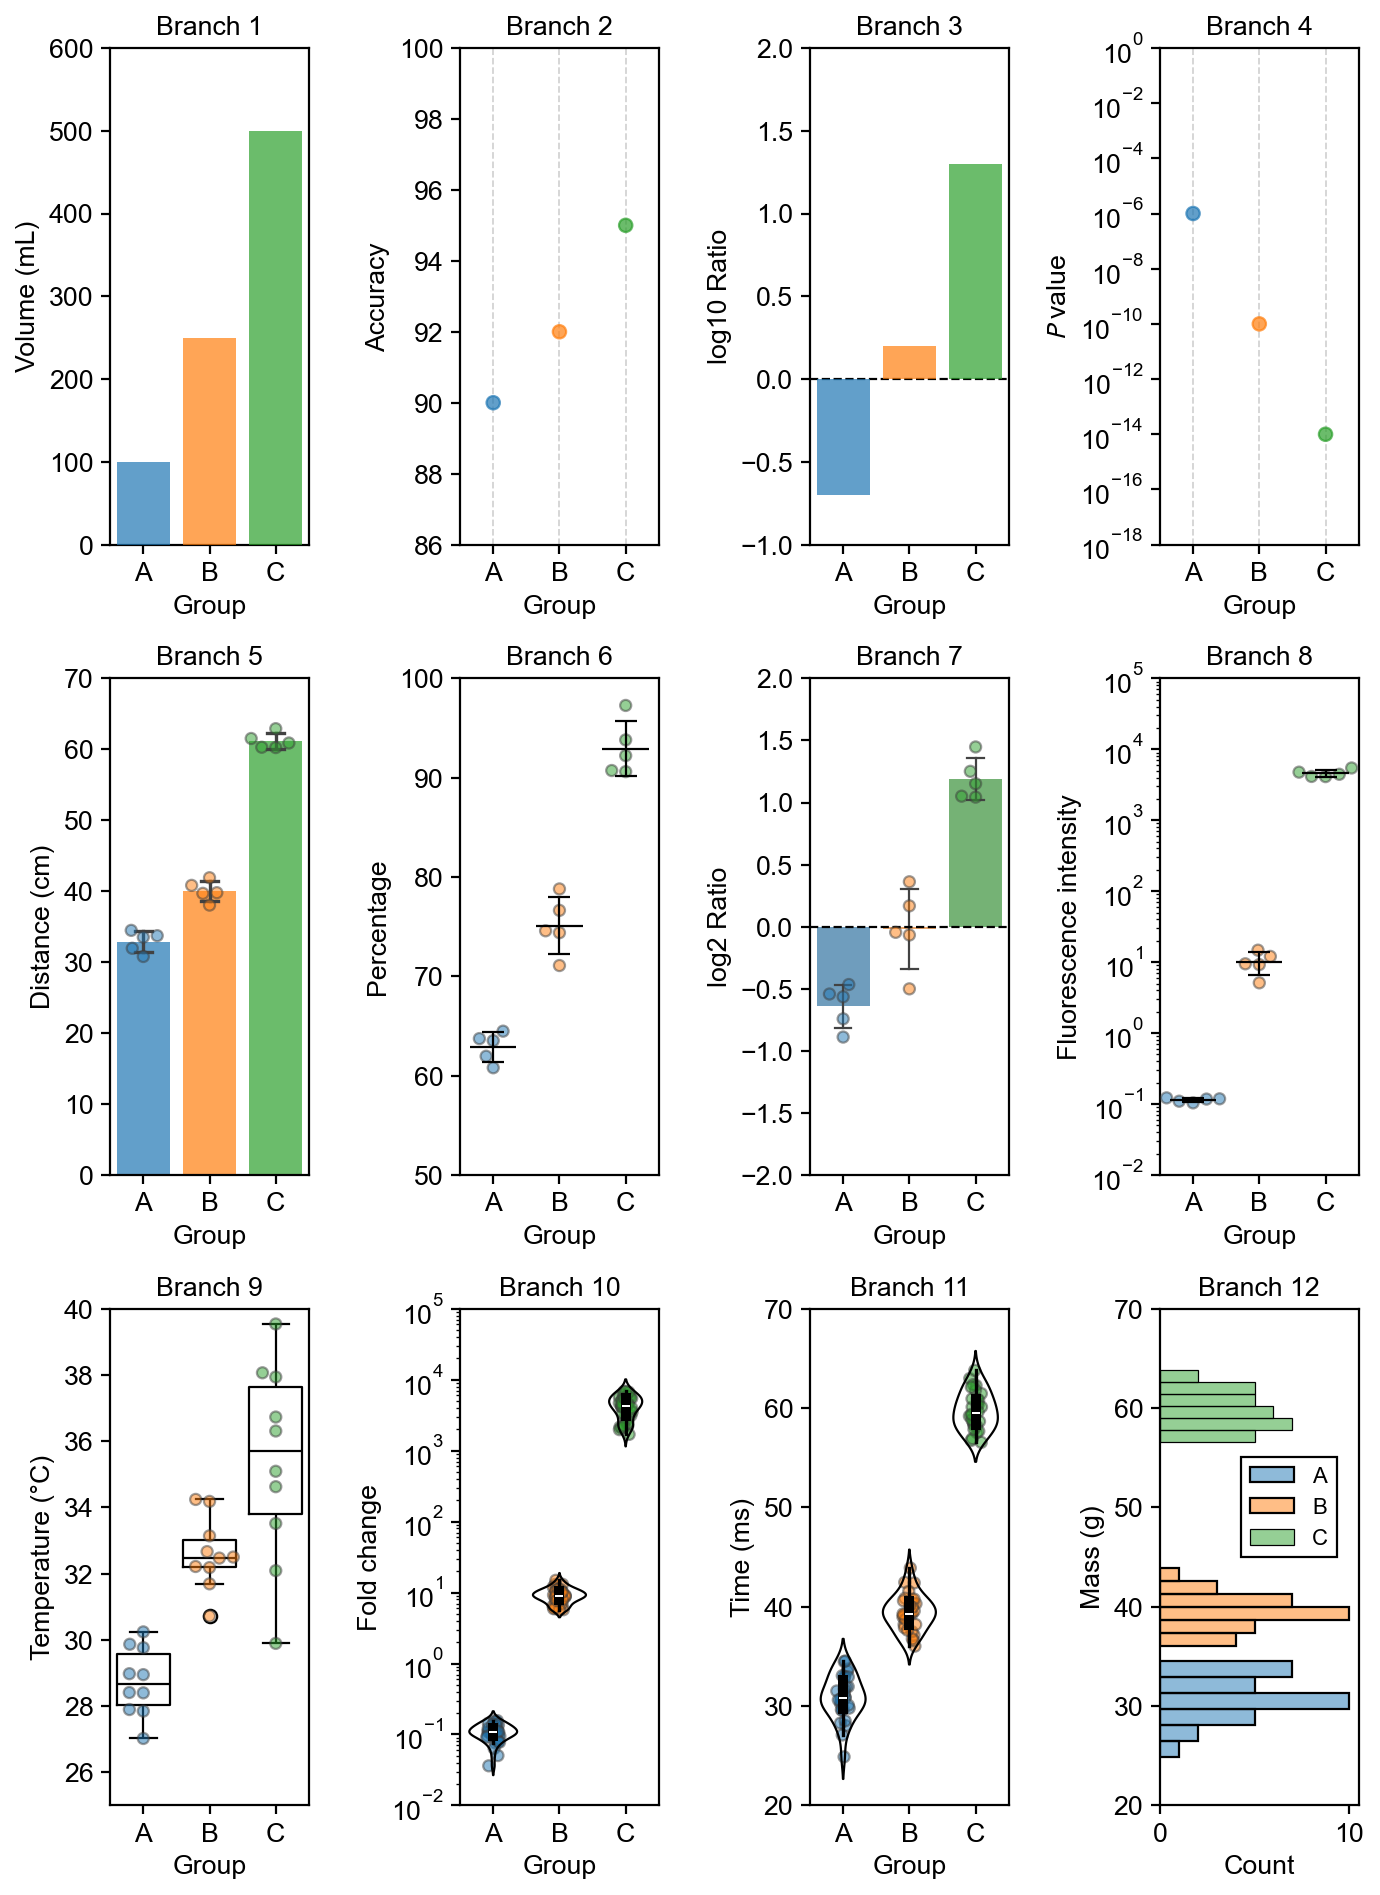

In [9]:
x = ['A', 'B', 'C']
colors = ['tab:blue', 'tab:orange', 'tab:green']

col = 4
row = 3
col_scale = 2.25
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))
axs_original = axs.copy()
axs = axs.reshape(-1)

i = 0
y = np.array([100, 250, 500])
axs[i].bar(x, y, alpha=BAR_ALPHA, color=colors, zorder=100)
axs[i].set_ylim(0, 600)
axs[i].set_xlim(-0.5, len(y)-0.5)
axs[i].set_ylabel('Volume (mL)')

i = 1
y = np.array([90, 92, 95])
axs[i].scatter(x, y, alpha=BAR_ALPHA, color=colors, zorder=100)
axs[i].set_ylim(86, 100)
axs[i].set_xlim(-0.5, len(y)-0.5)
axs[i].grid(axis='x', zorder=-100, color='lightgray', ls='--')
axs[i].set_ylabel('Accuracy')

i = 2
y = np.array([-0.7, 0.2, 1.3])
axs[i].bar(x, y, alpha=BAR_ALPHA, color=colors, zorder=100)
axs[i].set_ylim(-1, 2)
axs[i].set_xlim(-0.5, len(y)-0.5)
axs[i].set_ylabel('log10 Ratio')
axs[i].axhline(0, color='k', lw=1, ls='--')

i = 3
y = np.array([-6, -10, -14])
axs[i].scatter(x, 10.**y, zorder=100, alpha=BAR_ALPHA, color=colors)
axs[i].set_ylim(1e-18, 1e0)
axs[i].set_xlim(-0.5, len(y)-0.5)
axs[i].grid(axis='x', zorder=-100, color='lightgray', ls='--')
axs[i].set_yscale('log')
axs[i].set_ylabel('$P$ value')

i = 4
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(30, 2, 5).reshape(-1, 1),
    np.random.normal(40, 2, 5).reshape(-1, 1),
    np.random.normal(60, 2, 5).reshape(-1, 1),
]))
swarm_df.columns = x
bar_df = swarm_df
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    saturation=1,
    ax=axs[i],
)
sns.swarmplot(
    bar_df,
    linewidth=1,
    alpha=0.5,
    ax=axs[i],
)
axs[i].set_xlim(-0.5, len(y)-0.5)
axs[i].set_ylim(0, 70)
axs[i].set_ylabel('Distance (cm)')

i = 5
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(60, 2, 5).reshape(-1, 1),
    np.random.normal(75, 4, 5).reshape(-1, 1),
    np.random.normal(90, 5, 5).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df
mean_bar(bar_df, ax=axs[i], width=0.35)
sns.swarmplot(
    bar_df,
    linewidth=1,
    alpha=0.5,
    ax=axs[i],
)
axs[i].set_ylim(50, 100)
axs[i].set_ylabel('Percentage')

i = 6
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.5, 0.1, 5).reshape(-1, 1),
    np.random.normal(1, 0.3, 5).reshape(-1, 1),
    np.random.normal(2, 0.5, 5).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df
bar_plot(np.log2(bar_df), axs[i])
sns.swarmplot(
    np.log2(bar_df),
    linewidth=1,
    alpha=0.5,
    ax=axs[i],
)
axs[i].axhline(0, color='k', lw=1, ls='--')
axs[i].set_ylim(-2, 2)
axs[i].set_ylabel('log2 Ratio')

i = 7
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.1, 0.01, 5).reshape(-1, 1),
    np.random.normal(10, 5, 5).reshape(-1, 1),
    np.random.normal(4000, 1000, 5).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df
mean_bar(bar_df, ax=axs[i], width=0.35)
sns.swarmplot(
    bar_df,
    linewidth=1,
    alpha=0.5,
    ax=axs[i],
)
axs[i].set_ylim(1e-2, 1e5)
axs[i].set_yscale('log')
axs[i].set_ylabel('Fluorescence intensity')

i = 8
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(28, 1, 10).reshape(-1, 1),
    np.random.normal(32, 1.5, 10).reshape(-1, 1),
    np.random.normal(35, 2, 10).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df
sns.boxplot(
    bar_df,
    linewidth=1,
    color='k',
    fill=False,
    ax=axs[i],
)
sns.swarmplot(
    bar_df,
    linewidth=1,
    alpha=0.5,
    ax=axs[i],
)
axs[i].set_ylim(25, 40)
axs[i].set_ylabel('Temperature (°C)')

i = 9
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.1, 0.025, 35).reshape(-1, 1),
    np.random.normal(10, 2.5, 35).reshape(-1, 1),
    np.random.normal(4000, 1500, 35).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df
sns.violinplot(
    bar_df,
    linewidth=1,
    color='k',
    fill=False,
    log_scale=True,
    ax=axs[i],
)
sns.stripplot(
    bar_df,
    linewidth=1,
    alpha=0.5,
    ax=axs[i],
    zorder=0
)
axs[i].set_ylim(1e-2, 1e5)
axs[i].set_ylabel('Fold change')

i = 10
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(30, 2, 30).reshape(-1, 1),
    np.random.normal(40, 2, 30).reshape(-1, 1),
    np.random.normal(60, 2, 30).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df
sns.violinplot(
    bar_df,
    linewidth=1,
    color='k',
    fill=False,
    ax=axs[i],
)
sns.stripplot(
    bar_df,
    linewidth=1,
    alpha=0.5,
    ax=axs[i],
    zorder=0
)
axs[i].set_ylim(20, 70)
axs[i].set_ylabel('Time (ms)')

i = 11
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(30, 2, 30).reshape(-1, 1),
    np.random.normal(40, 2, 30).reshape(-1, 1),
    np.random.normal(60, 2, 30).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df
sns.histplot(
    bar_df,
    y='A',
    alpha=0.5,
    ax=axs[i],
    label='A',
)
sns.histplot(
    bar_df,
    y='B',
    alpha=0.5,
    ax=axs[i],
    label='B',
)
sns.histplot(
    bar_df,
    y='C',
    alpha=0.5,
    ax=axs[i],
    label='C',
)
axs[i].set_ylim(20, 70)
axs[i].set_ylabel('Mass (g)')
axs[i].legend(loc='center', bbox_to_anchor=(0.65, 0.6))

for i in range(0, 12):
    axs[i].set_box_aspect(2.5)
    axs[i].set_title(f'Branch {i+1}')
for i in range(0, 11):
    axs[i].set_xlabel('Group')

plt.tight_layout()
fig.savefig('figures/subpanels/ex-fig-10-example.pdf')

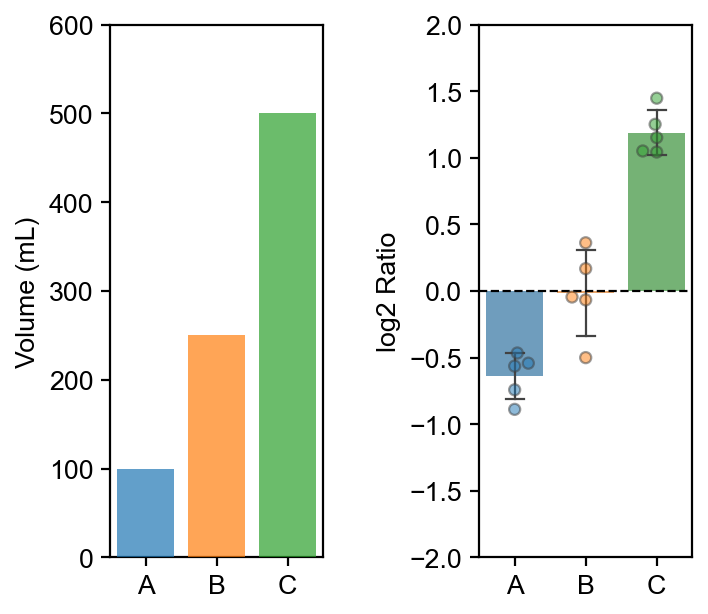

In [10]:
x = ['A', 'B', 'C']
col = 2
row = 1
col_scale = 2.5
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))
i = 0
y = np.array([100, 250, 500])
axs[i].bar(x, y, alpha=BAR_ALPHA, color=colors, zorder=100)
axs[i].set_ylim(0, 600)
axs[i].set_xlim(-0.5, len(y)-0.5)
axs[i].set_ylabel('Volume (mL)')

i = 1
np.random.seed(0)
swarm_df = pd.DataFrame(np.hstack([
    np.random.normal(0.5, 0.1, 5).reshape(-1, 1),
    np.random.normal(1, 0.3, 5).reshape(-1, 1),
    np.random.normal(2, 0.5, 5).reshape(-1, 1),
]))
swarm_df.columns = ['A', 'B', 'C']
bar_df = swarm_df
bar_plot(np.log2(bar_df), axs[i])
sns.swarmplot(
    np.log2(bar_df),
    linewidth=1,
    alpha=0.5,
    ax=axs[i],
)
axs[i].axhline(0, color='k', lw=1, ls='--')
axs[i].set_ylim(-2, 2)
axs[i].set_ylabel('log2 Ratio')

for i in range(0, 2):
    axs[i].set_box_aspect(2.5)

plt.tight_layout()
fig.savefig('figures/subpanels/fig-2e-guideline.pdf')

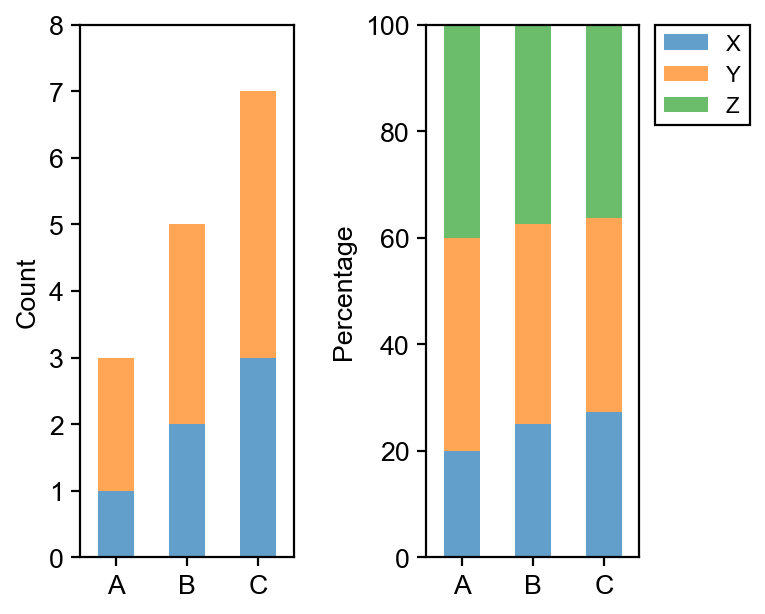

In [11]:
col = 2
row = 1
col_scale = 2.5
row_scale = 4

fig, axs = plt.subplots(row, col, figsize=(col*col_scale, row*row_scale))
i = 0

df = pd.DataFrame({
    'x': ['A', 'B', 'C'],
    'y1': [1, 2, 3],
    'y2': [2, 3, 4],
})
df.plot.bar(
    rot=0,
    stacked=True,
    alpha=BAR_ALPHA,
    legend=False,
    ax=axs[i],
)
axs[i].set_ylabel('Count')
axs[i].set_xticklabels(x)
axs[i].set_ylim(0, 8)
axs[i].set_xlim(-0.5, len(y)-0.5)


i = 1
df = pd.DataFrame({
    'x': ['A', 'B', 'C'],
    'X': np.array([1/5, 2/8, 3/11]) * 100,
    'Y': np.array([2/5, 3/8, 4/11]) * 100,
    'Z': np.array([2/5, 3/8, 4/11]) * 100,
})
df.plot.bar(
    rot=0,
    stacked=True,
    alpha=BAR_ALPHA,
    ax=axs[i],
)
axs[i].set_ylabel('Percentage')
axs[i].set_xticklabels(x)
axs[i].set_ylim(0, 100)
axs[i].set_xlim(-0.5, len(y)-0.5)
axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))

for i in range(0, 2):
    axs[i].set_box_aspect(2.5)

plt.tight_layout()
fig.savefig('figures/subpanels/fig-2g-guideline.pdf')

## Survey questions

### 1

Text(0, 0.5, 'Length (cm)')

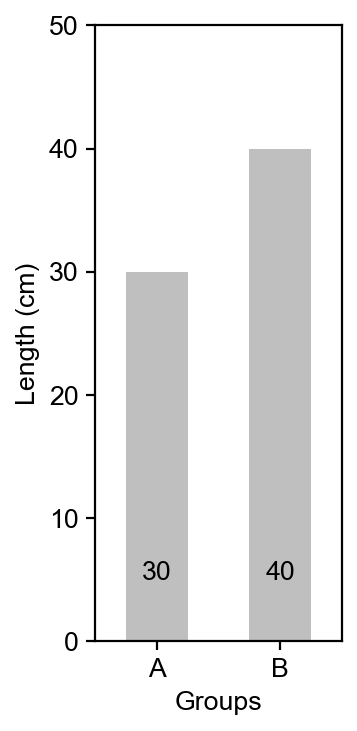

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)
ax.bar(
    ['A', 'B'],
    [30, 40],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    30,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    40,
    ha='center',
    transform=ax.transAxes,
)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 50)
ax.set_xlabel('Groups')
ax.set_ylabel('Length (cm)')

Text(0, 0.5, 'Length (cm)')

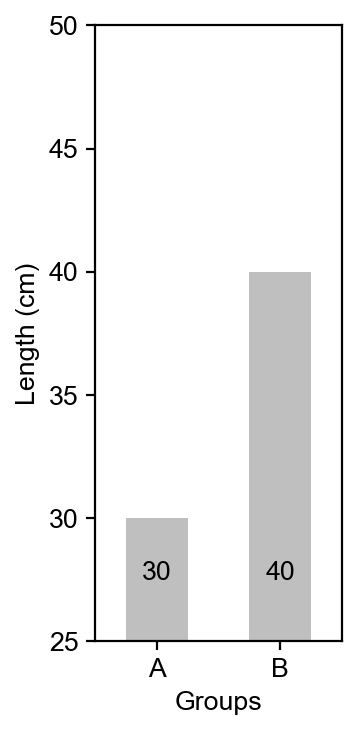

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)
ax.bar(
    ['A', 'B'],
    [30, 40],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    30,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    40,
    ha='center',
    transform=ax.transAxes,
)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(25, 50)
ax.set_xlabel('Groups')
ax.set_ylabel('Length (cm)')

Text(0, 0.5, 'Temperature (°C)')

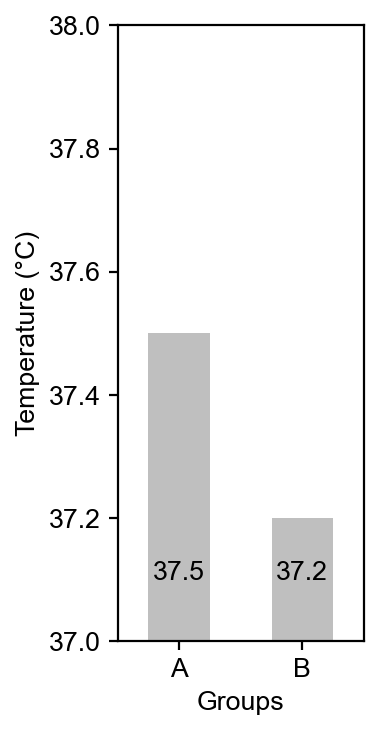

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)
ax.bar(
    ['A', 'B'],
    [37.5, 37.2],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    37.5,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    37.2,
    ha='center',
    transform=ax.transAxes,
)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(37, 38)
ax.set_xlabel('Groups')
ax.set_ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

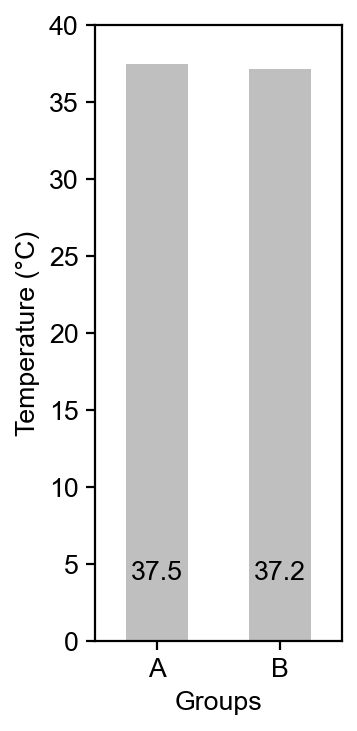

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)
ax.bar(
    ['A', 'B'],
    [37.5, 37.2],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    37.5,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    37.2,
    ha='center',
    transform=ax.transAxes,
)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 40)
ax.set_xlabel('Groups')
ax.set_ylabel('Temperature (°C)')

### 2

Text(0, 0.5, 'P value')

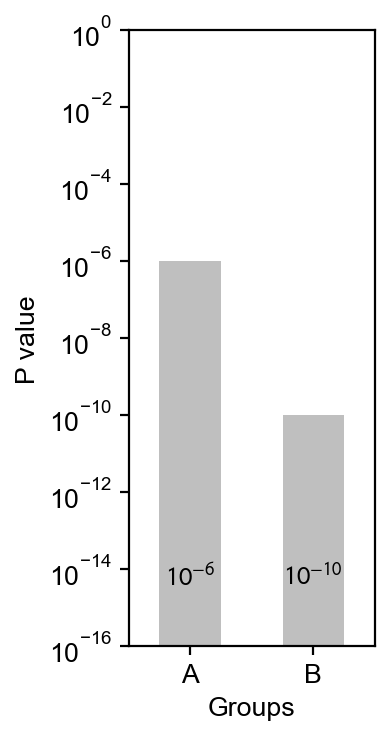

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B'],
    [1e-6, 1e-10],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    '$10^{-6}$',
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    '$10^{-10}$',
    ha='center',
    transform=ax.transAxes,
)
ax.set_yscale('log')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1e-16, 1e0)
ax.set_xlabel('Groups')
ax.set_ylabel('P value')

Text(0, 0.5, 'P value')

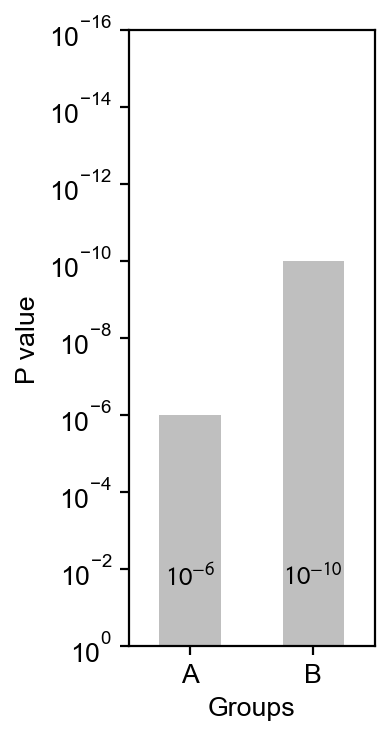

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B'],
    [1e-6 - 1, 1e-10 - 1],
    bottom=1,
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    '$10^{-6}$',
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    '$10^{-10}$',
    ha='center',
    transform=ax.transAxes,
)
ax.set_yscale('log')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1e-0, 1e-16)
ax.set_xlabel('Groups')
ax.set_ylabel('P value')

Text(0, 0.5, 'Fluorescence intensity')

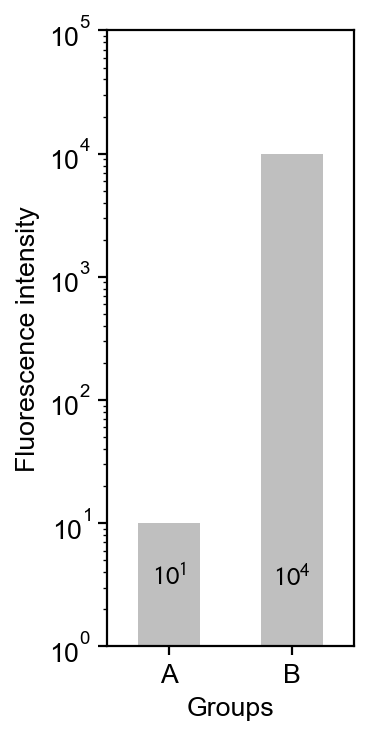

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B'],
    [1e1, 1e4],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    '$10^{1}$',
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    '$10^{4}$',
    ha='center',
    transform=ax.transAxes,
)
ax.set_yscale('log')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1e0, 1e5)
ax.set_xlabel('Groups')
ax.set_ylabel('Fluorescence intensity')

Text(0, 0.5, 'Fluorescence intensity')

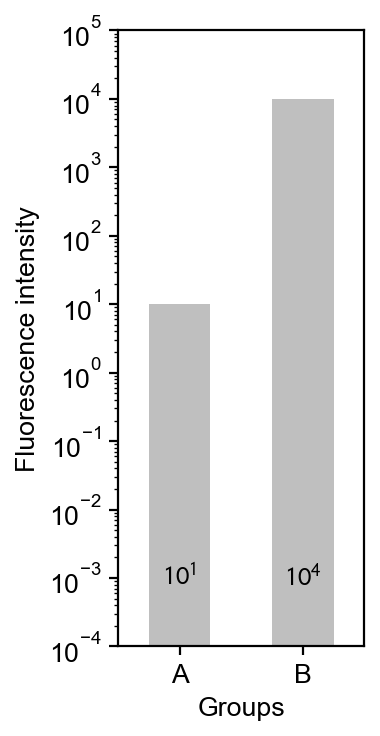

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B'],
    [1e1, 1e4],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    '$10^{1}$',
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    '$10^{4}$',
    ha='center',
    transform=ax.transAxes,
)
ax.set_yscale('log')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1e-4, 1e5)
ax.set_xlabel('Groups')
ax.set_ylabel('Fluorescence intensity')

Text(0, 0.5, 'log10 Fluorescence intensity')

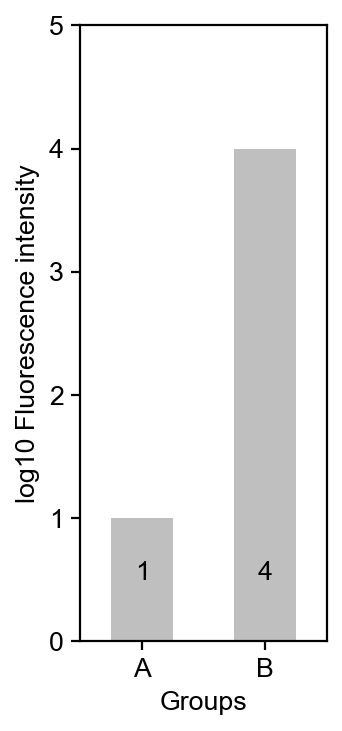

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B'],
    [1, 4],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.1,
    1,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.1,
    4,
    ha='center',
    transform=ax.transAxes,
)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 5)
ax.set_xlabel('Groups')
ax.set_ylabel('log10 Fluorescence intensity')

Text(0, 0.5, 'log10 Fluorescence intensity')

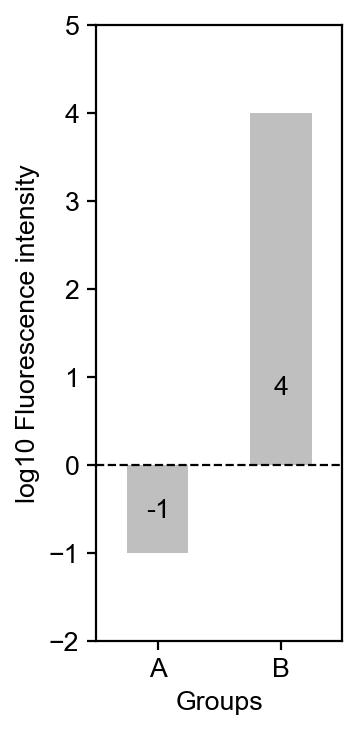

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B'],
    [-1, 4],
    color='k',
    alpha=0.25,
    width=0.5,
)
ax.text(
    0.25, 0.2,
    -1,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    0.75, 0.4,
    4,
    ha='center',
    transform=ax.transAxes,
)
ax.axhline(0, color='k', ls='--')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-2, 5)
ax.set_xlabel('Groups')
ax.set_ylabel('log10 Fluorescence intensity')

### 3

Text(0, 0.5, 'Ratio')

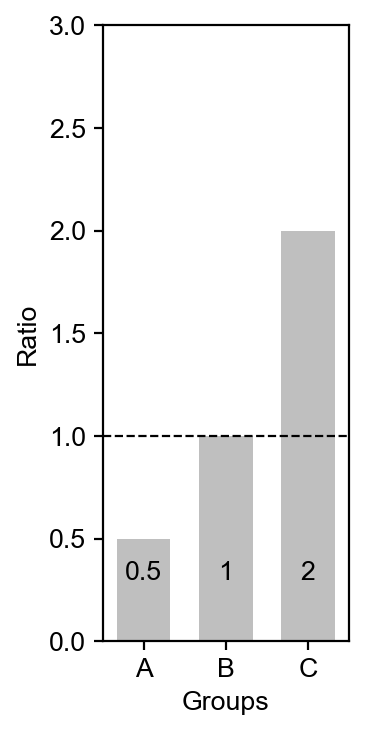

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)
ax.bar(
    ['A', 'B', 'C'],
    [0.5, 1, 2],
    color='k',
    alpha=0.25,
    width=0.65,
)
ax.text(
    1/6, 0.1,
    0.5,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    3/6, 0.1,
    1,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    5/6, 0.1,
    2,
    ha='center',
    transform=ax.transAxes,
)
ax.axhline(1, color='k', ls='--')
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 3)
ax.set_xlabel('Groups')
ax.set_ylabel('Ratio')

Text(0, 0.5, 'log2 Ratio')

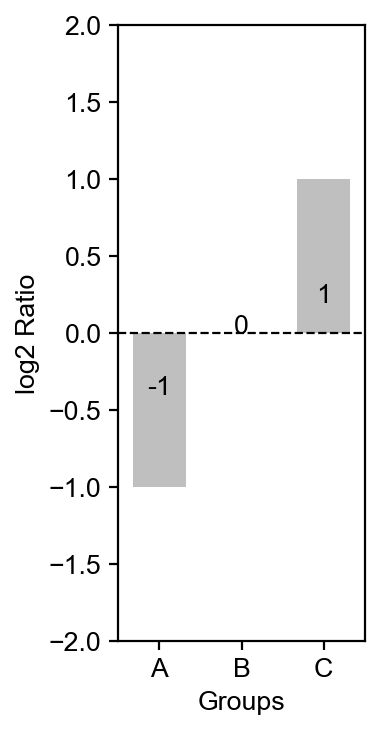

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B', 'C'],
    [-1, 0, 1],
    color='k',
    alpha=0.25,
    width=0.65,
)
ax.text(
    1/6, 0.4,
    -1,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    3/6, 0.5,
    0,
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    5/6, 0.55,
    1,
    ha='center',
    transform=ax.transAxes,
)
ax.axhline(0, color='k', ls='--')
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-2, 2)
ax.set_xlabel('Groups')
ax.set_ylabel('log2 Ratio')

Text(0, 0.5, 'Ratio')

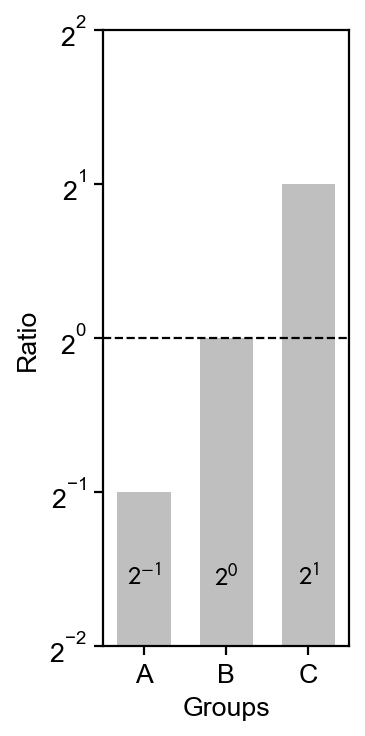

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B', 'C'],
    [0.5, 1, 2],
    color='k',
    alpha=0.25,
    width=0.65,
)
ax.text(
    1/6, 0.1,
    '$2^{-1}$',
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    3/6, 0.1,
    '$2^{0}$',
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    5/6, 0.1,
    '$2^{1}$',
    ha='center',
    transform=ax.transAxes,
)
ax.axhline(1, color='k', ls='--')
ax.set_yscale('log', base=2)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(2**-2, 2**2)
ax.set_xlabel('Groups')
ax.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

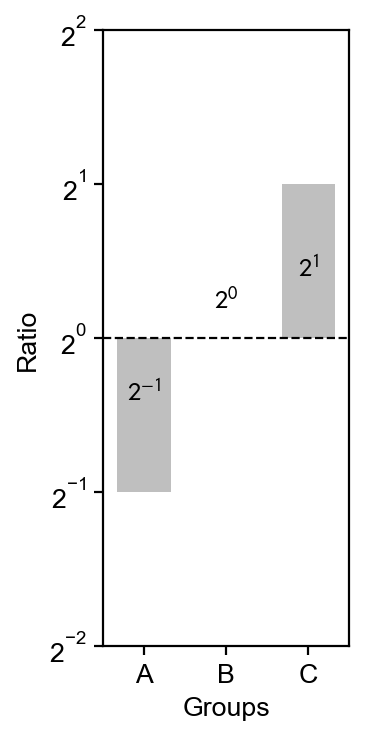

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_box_aspect(2.5)

ax.bar(
    ['A', 'B', 'C'],
    [0.5-1, 1-1, 2-1],
    bottom=1,
    color='k',
    alpha=0.25,
    width=0.65,
)
ax.text(
    1/6, 0.4,
    '$2^{-1}$',
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    3/6, 0.55,
    '$2^{0}$',
    ha='center',
    transform=ax.transAxes,
)
ax.text(
    5/6, 0.6,
    '$2^{1}$',
    ha='center',
    transform=ax.transAxes,
)
ax.axhline(1, color='k', ls='--')
ax.set_yscale('log', base=2)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(2**-2, 2**2)
ax.set_xlabel('Groups')
ax.set_ylabel('Ratio')